# Tidy Data and Reshaping Datasets

In [1]:
import pandas as pd
import seaborn as sns

sns.set_theme(palette='colorblind',font_scale=2)

In [2]:
url_base = 'https://raw.githubusercontent.com/rhodyprog4ds/rhodyds/main/data/'

datasets = ['study_a.csv','study_b.csv','study_c.csv']

In [3]:
list_of_df = [pd.read_csv(url_base + dataset,na_values='-') for dataset in datasets]

In [4]:
list_of_df[0]

,name,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [5]:
list_of_df[1]

,intervention,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16,3
1,treatmentb,2.0,11,1


In [6]:
list_of_df[2]

,person,treatment,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [7]:
list_of_df[2].mean()

/tmp/ipykernel_1853/1880485675.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  list_of_df[2].mean()


result    6.6
dtype: float64

In [8]:
sum([16,3,2,11,1])/5

6.6

In [9]:
sum([16,3,2,11,1,0])/6

5.5

In [10]:
list_of_df[2].groupby('treatment').mean()

/tmp/ipykernel_1853/2310255724.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_of_df[2].groupby('treatment').mean()


,result
treatment,
a,9.500000
b,4.666667


In [11]:
list_of_df[2].groupby('person').mean()

/tmp/ipykernel_1853/344217198.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  list_of_df[2].groupby('person').mean()


,result
person,
Jane Doe,13.5
John Smith,2.0
Mary Johnson,2.0


In [12]:
dfa = list_of_df[0]
dfa

,name,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [13]:
dfa.melt(id_vars=['name'],var_name='treatment',value_name='result')

,name,treatment,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [14]:
arabica_data_url = 'https://raw.githubusercontent.com/jldbc/coffee-quality-database/master/data/arabica_data_cleaned.csv'
# load the data
coffee_df = pd.read_csv(arabica_data_url)
# get total bags per country
bags_per_country = coffee_df.groupby('Country.of.Origin')['Number.of.Bags'].sum()

# sort descending, keep only the top 10 and pick out only the country names
top_bags_country_list = bags_per_country.sort_values(ascending=False)[:10].index

# filter the original data for only the countries in the top list
top_coffee_df = coffee_df[coffee_df['Country.of.Origin'].isin(top_bags_country_list)]

In [15]:
bags_per_country

Country.of.Origin
Brazil                          30534
Burundi                           520
China                              55
Colombia                        41204
Costa Rica                      10354
Cote d?Ivoire                       2
Ecuador                             1
El Salvador                      4449
Ethiopia                        11761
Guatemala                       36868
Haiti                             390
Honduras                        13167
India                              20
Indonesia                        1658
Japan                              20
Kenya                            3971
Laos                               81
Malawi                            557
Mauritius                           1
Mexico                          24140
Myanmar                            10
Nicaragua                        6406
Panama                            537
Papua New Guinea                    7
Peru                             2336
Philippines                     

In [16]:
top_bags_country_list

Index(['Colombia', 'Guatemala', 'Brazil', 'Mexico', 'Honduras', 'Ethiopia',
       'Costa Rica', 'Nicaragua', 'El Salvador', 'Kenya'],
      dtype='object', name='Country.of.Origin')

In [17]:
top_coffee_df.head(1)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [18]:
coffee_df.head(1)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [19]:
coffee_df.shape,top_coffee_df.shape

((1311, 44), (952, 44))

In [20]:
top_coffee_df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,952.000000,951.000000,952.000000,830.000000,830.000000,830.000000
mean,653.811975,192.073529,7.557468,7.513330,7.379338,7.533172,7.505662,7.513214,9.839296,9.825557,9.912384,7.483057,82.062626,0.091292,0.380252,0.214511,4.011555,1918.387596,1966.069061,1942.228329
std,378.427772,120.682457,0.400004,0.418425,0.430553,0.403558,0.383316,0.434140,0.584349,0.834365,0.548040,0.469682,3.839237,0.045773,1.658661,0.907420,5.493412,10009.962014,10009.287083,10009.183888
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,323.750000,50.000000,7.420000,7.330000,7.170000,7.330000,7.330000,7.330000,10.000000,10.000000,10.000000,7.250000,81.170000,0.100000,0.000000,0.000000,1.000000,1150.000000,1200.000000,1200.000000
50%,659.500000,250.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.000000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1344.000000
75%,972.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.000000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,5.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.000000,10.000000,9.250000,90.580000,0.220000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


In [21]:
top_coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [22]:
ratings_of_interest = ['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', ]
coffe_scores_df = top_coffee_df.melt(id_vars='Country.of.Origin',value_vars=ratings_of_interest,
                   var_name='rating',value_name='score')
coffe_scores_df.head(1)

,Country.of.Origin,rating,score
0,Ethiopia,Aroma,8.67


In [23]:
top_coffee_df.melt(id_vars='Country.of.Origin')['variable'].unique()

array(['Unnamed: 0', 'Species', 'Owner', 'Farm.Name', 'Lot.Number',
       'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity',
       'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Cupper.Points', 'Total.Cup.Points', 'Moisture',
       'Category.One.Defects', 'Quakers', 'Color', 'Category.Two.Defects',
       'Expiration', 'Certification.Body', 'Certification.Address',
       'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters',
       'altitude_mean_meters'], dtype=object)

In [24]:
top_coffee_df.melt(id_vars='Country.of.Origin',value_vars=ratings_of_interest,)['variable'].unique()

array(['Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance'],
      dtype=object)

In [25]:
%matplotlib inline

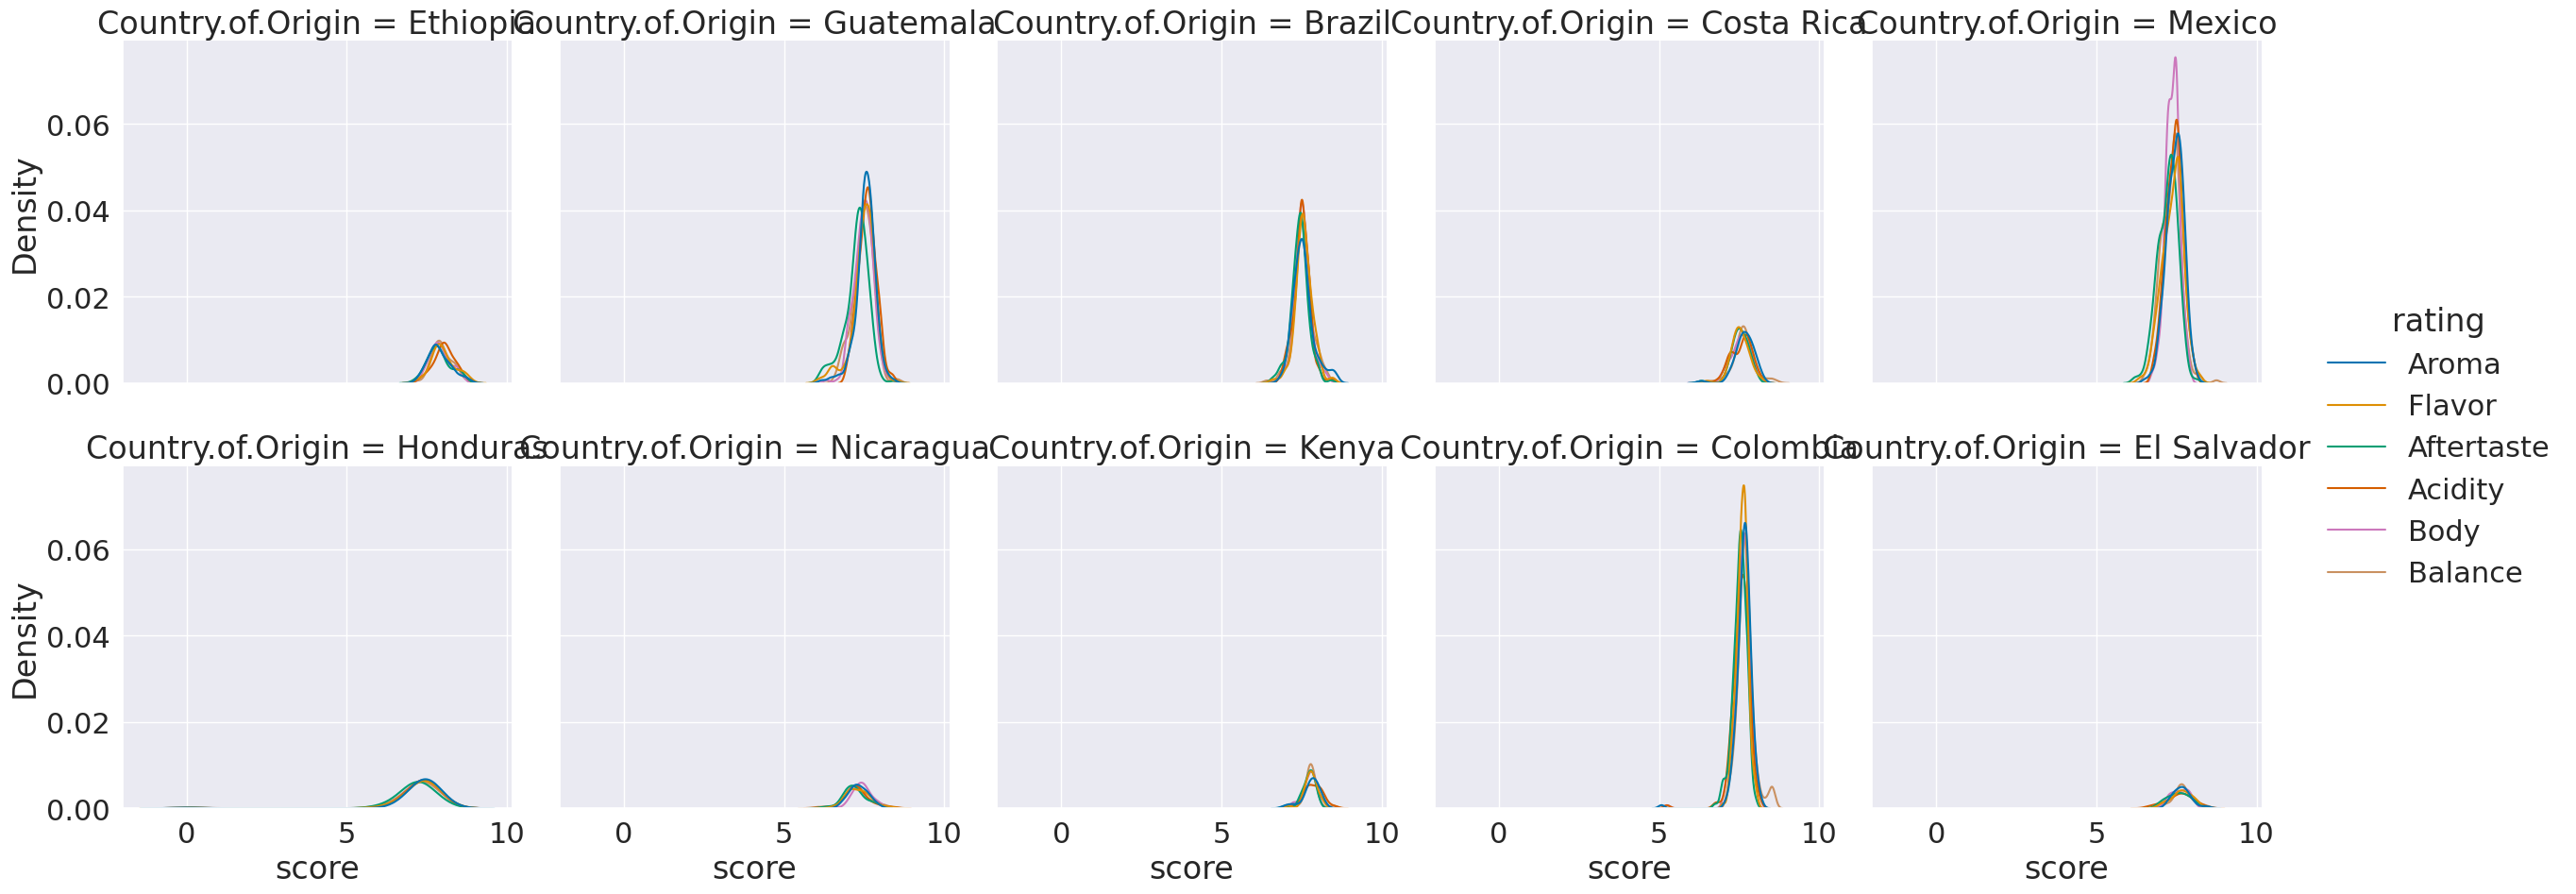

In [26]:
sns.displot(data=coffe_scores_df, x='score',col='Country.of.Origin',
           hue = 'rating',col_wrap=5,kind='kde')

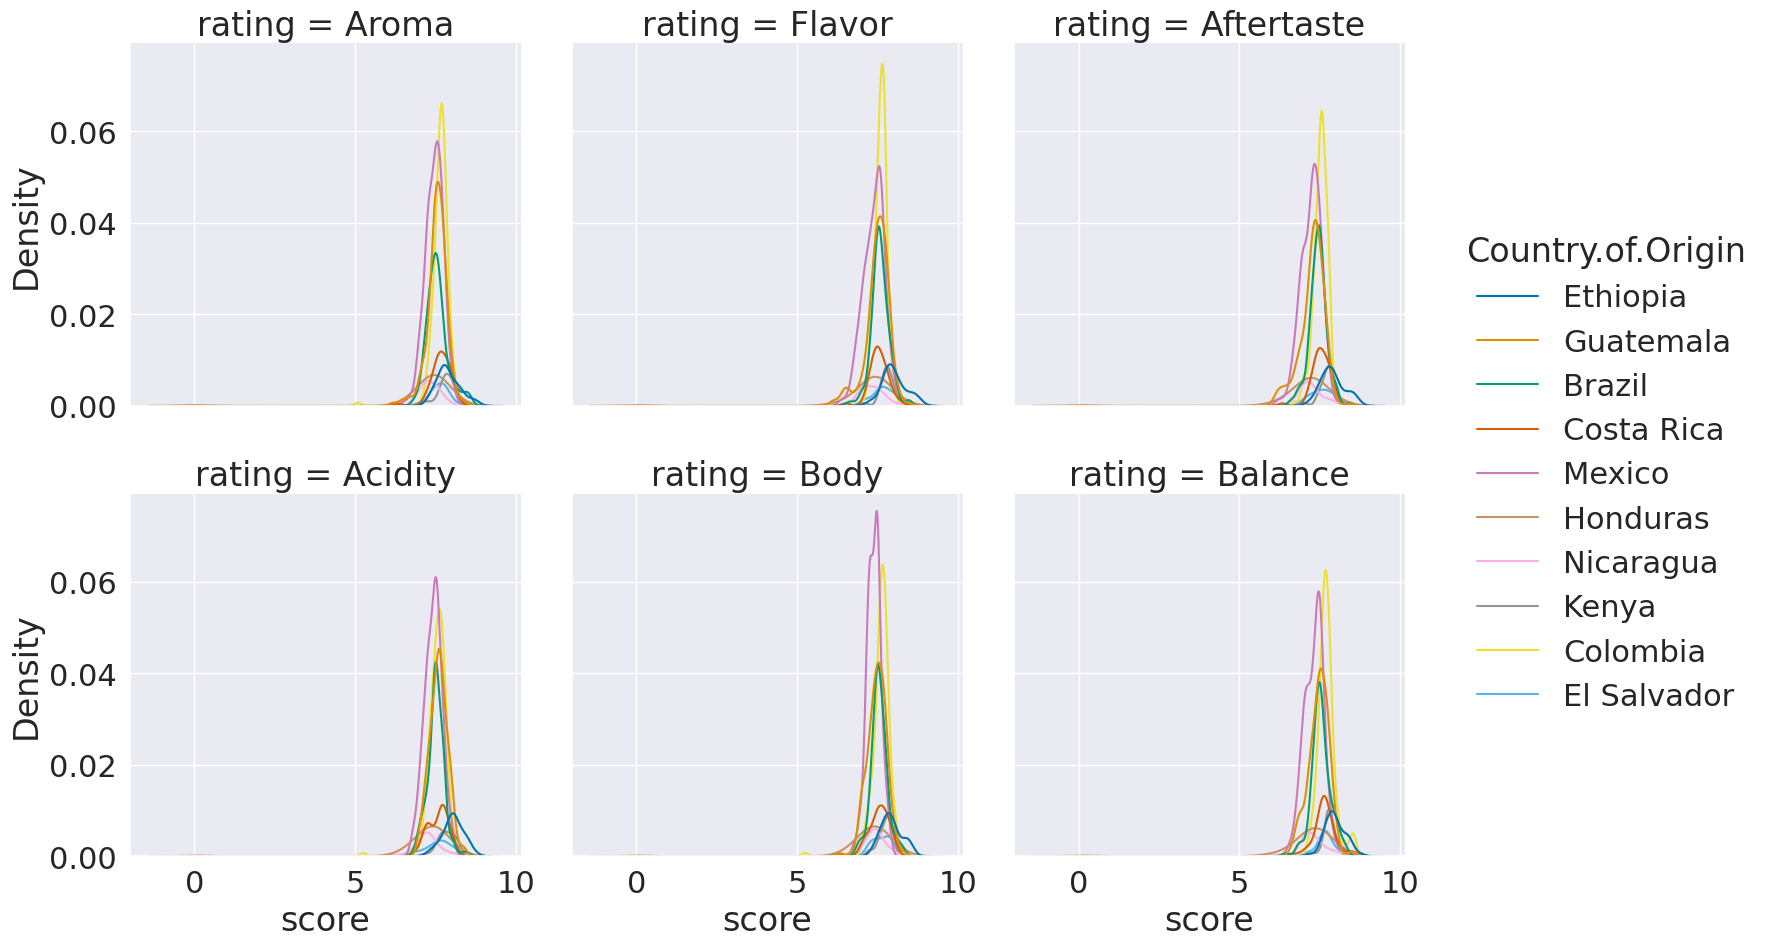

In [27]:
sns.displot(data=coffe_scores_df, x='score',hue='Country.of.Origin',
           col = 'rating',col_wrap=3,kind='kde')

In [28]:
top_coffee_df.columns

Index(['Unnamed: 0', 'Species', 'Owner', 'Country.of.Origin', 'Farm.Name',
       'Lot.Number', 'Mill', 'ICO.Number', 'Company', 'Altitude', 'Region',
       'Producer', 'Number.of.Bags', 'Bag.Weight', 'In.Country.Partner',
       'Harvest.Year', 'Grading.Date', 'Owner.1', 'Variety',
       'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body',
       'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness', 'Cupper.Points',
       'Total.Cup.Points', 'Moisture', 'Category.One.Defects', 'Quakers',
       'Color', 'Category.Two.Defects', 'Expiration', 'Certification.Body',
       'Certification.Address', 'Certification.Contact', 'unit_of_measurement',
       'altitude_low_meters', 'altitude_high_meters', 'altitude_mean_meters'],
      dtype='object')

In [29]:
coffe_scores_df2= top_coffee_df.melt(id_vars=['Country.of.Origin','Color'],value_vars=ratings_of_interest,
                   var_name='rating',value_name='score')
coffe_scores_df2.head(1)

,Country.of.Origin,Color,rating,score
0,Ethiopia,Green,Aroma,8.67


/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate.

/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
/tmp/ipykernel_1853/3482930274.py:1: UserWarning: Dataset has 0 variance; skipping density estimate.

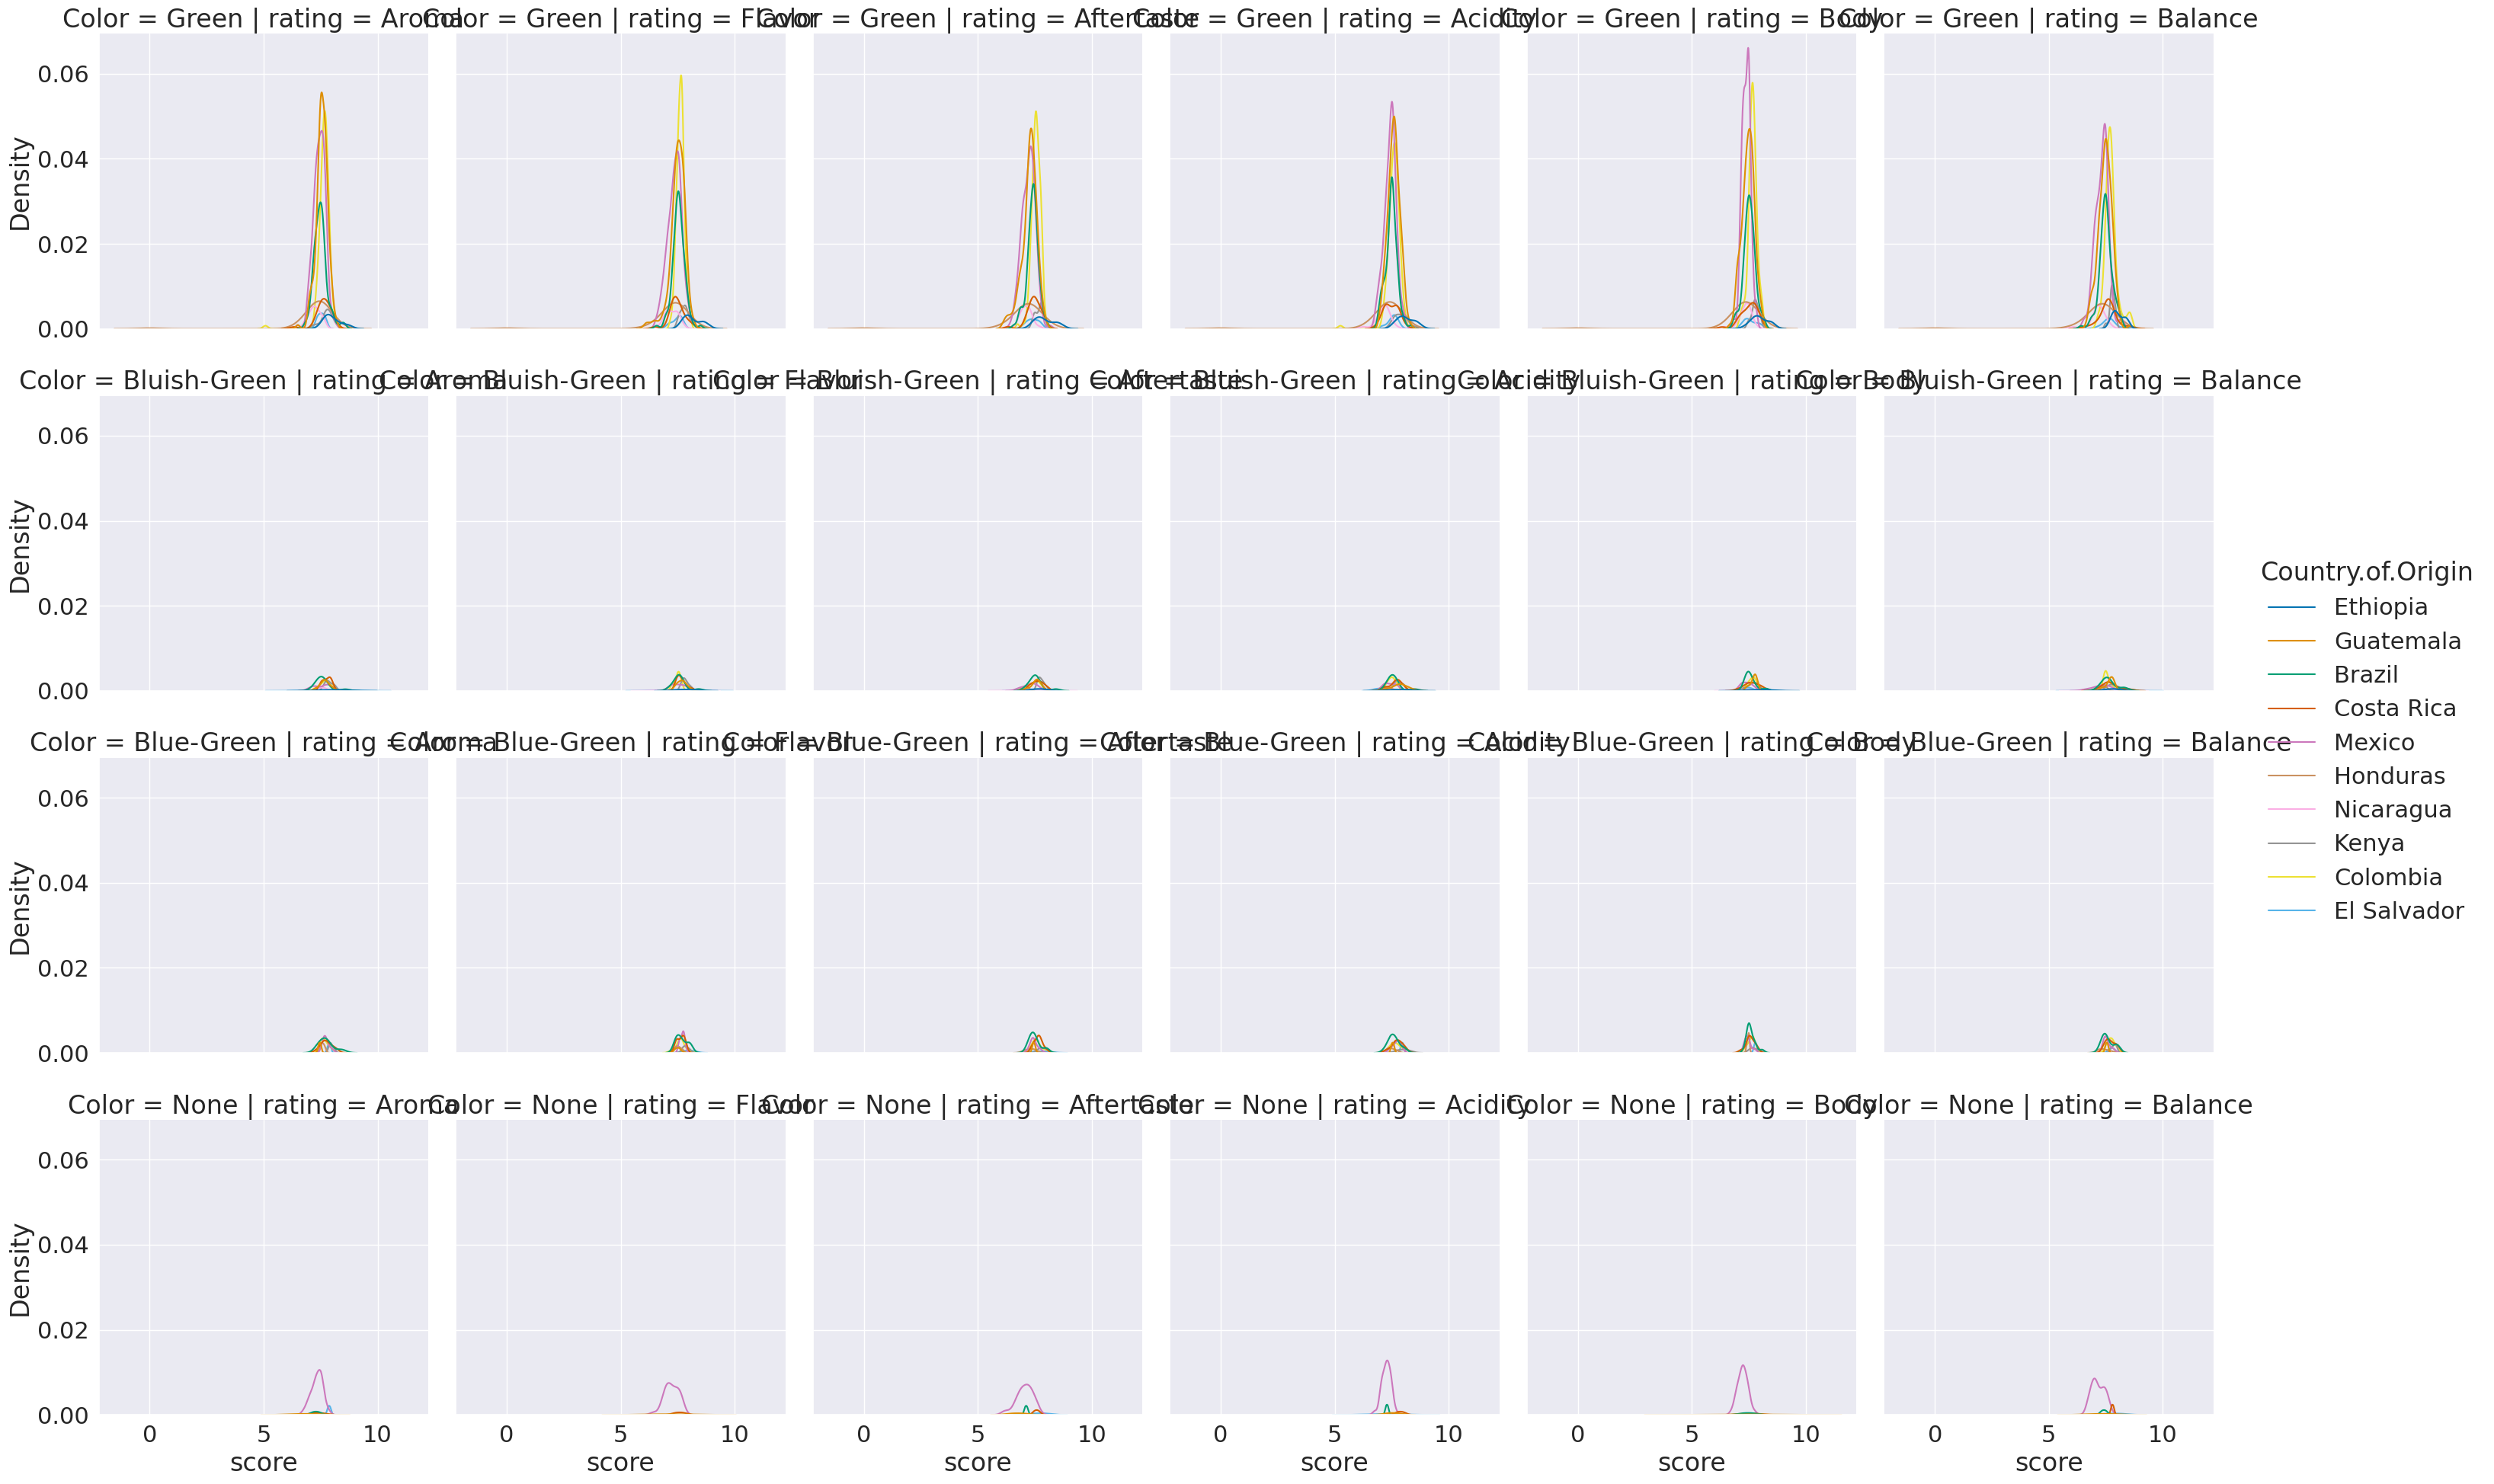

In [30]:
sns.displot(data=coffe_scores_df2, x='score',hue='Country.of.Origin',
           col = 'rating',row='Color',kind='kde')

In [31]:
coffee_df.describe()

,Unnamed: 0,Number.of.Bags,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean.Cup,Sweetness,Cupper.Points,Total.Cup.Points,Moisture,Category.One.Defects,Quakers,Category.Two.Defects,altitude_low_meters,altitude_high_meters,altitude_mean_meters
count,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1311.00000,1311.000000,1311.000000,1311.000000,1311.000000,1311.000000,1310.000000,1311.000000,1084.000000,1084.000000,1084.000000
mean,656.000763,153.887872,7.563806,7.518070,7.397696,7.533112,7.517727,7.517506,9.833394,9.83312,9.903272,7.497864,82.115927,0.088863,0.426392,0.177099,3.591915,1759.548954,1808.843803,1784.196379
std,378.598733,129.733734,0.378666,0.399979,0.405119,0.381599,0.359213,0.406316,0.559343,0.77135,0.530832,0.474610,3.515761,0.047957,1.832415,0.840583,5.350371,8767.847252,8767.187498,8767.016913
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,328.500000,14.500000,7.420000,7.330000,7.250000,7.330000,7.330000,7.330000,10.000000,10.00000,10.000000,7.250000,81.170000,0.090000,0.000000,0.000000,0.000000,1100.000000,1100.000000,1100.000000
50%,656.000000,175.000000,7.580000,7.580000,7.420000,7.500000,7.500000,7.500000,10.000000,10.00000,10.000000,7.500000,82.500000,0.110000,0.000000,0.000000,2.000000,1310.640000,1350.000000,1310.640000
75%,983.500000,275.000000,7.750000,7.750000,7.580000,7.750000,7.670000,7.750000,10.000000,10.00000,10.000000,7.750000,83.670000,0.120000,0.000000,0.000000,4.000000,1600.000000,1650.000000,1600.000000
max,1312.000000,1062.000000,8.750000,8.830000,8.670000,8.750000,8.580000,8.750000,10.000000,10.00000,10.000000,10.000000,90.580000,0.280000,31.000000,11.000000,55.000000,190164.000000,190164.000000,190164.000000


## More manipulations

Here, we will make a tiny `DataFrame` from scratch to illustrate a couple of points

In [32]:
large_num_df = pd.DataFrame(data= [[730000000,392000000,580200000],
                                   [315040009,580000000,967290000]],
                           columns = ['a','b','c'])
large_num_df

,a,b,c
0,730000000,392000000,580200000
1,315040009,580000000,967290000


This dataet is not tidy, but making it this way was faster to set it up.  We could make it tidy using melt as is.

In [33]:
large_num_df.melt()

,variable,value
0,a,730000000
1,a,315040009
2,b,392000000
3,b,580000000
4,c,580200000
5,c,967290000


However, I want an additional variable, so I wil reset the index, which adds an index column for the original index and adds a new index that is numerical. In this case they're the same.

In [34]:
large_num_df.reset_index()

,index,a,b,c
0,0,730000000,392000000,580200000
1,1,315040009,580000000,967290000


If I melt this one, using the index as the `id`, then I get a reasonable tidy DataFrame

In [35]:
ls_tall_df = large_num_df.reset_index().melt(id_vars='index')
ls_tall_df

,index,variable,value
0,0,a,730000000
1,1,a,315040009
2,0,b,392000000
3,1,b,580000000
4,0,c,580200000
5,1,c,967290000


Now, we can plot.

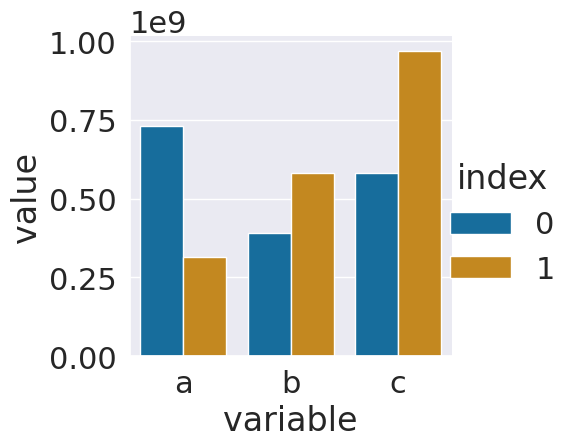

In [36]:
sns.catplot(data = ls_tall_df,x='variable',y='value',
            hue='index',kind='bar')

Since the numbers are so big, this might be hard to interpret.  Displaying it with all the 0s would not be easier to read.  The best thing to do is to add a new colum with adjusted values and a corresponding title.

In [37]:
ls_tall_df['value (millions)'] = ls_tall_df['value']/1000000
ls_tall_df.head()

,index,variable,value,value (millions)
0,0,a,730000000,730.000000
1,1,a,315040009,315.040009
2,0,b,392000000,392.000000
3,1,b,580000000,580.000000
4,0,c,580200000,580.200000


Now we can plot again, with the smaller values and an updated axis label.  Adding a column with the adjusted title is good practice because it does not lose any data and since we set the value and the title at the same time it keeps it clear what the values are.

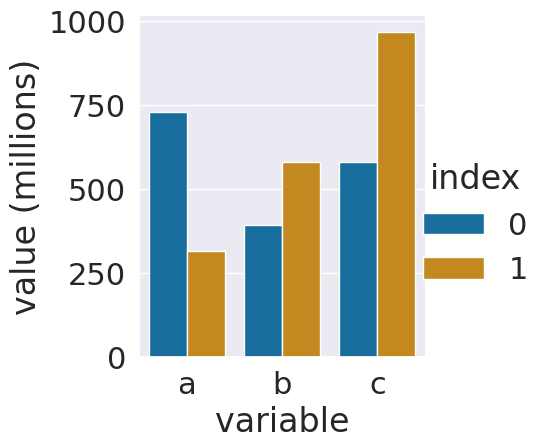

In [38]:
sns.catplot(data = ls_tall_df,x='variable',y='value (millions)',
            hue='index',kind='bar')